In [1]:
# importing libraries
import pandas as pd
import numpy as np


In [2]:
#importing data
df = pd.read_csv("Tweets.csv")


In [3]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [5]:
df.shape

(14640, 15)

In [6]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
#%null
((len(df)-df.count())/len(df))*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

In [8]:
df.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord'],inplace=True,axis=1)

In [9]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
sentiment_count = df.airline_sentiment.value_counts()
#Airline Review Count
airline_total = df['airline'].value_counts()

In [11]:
sentiment_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Airline Review Count')

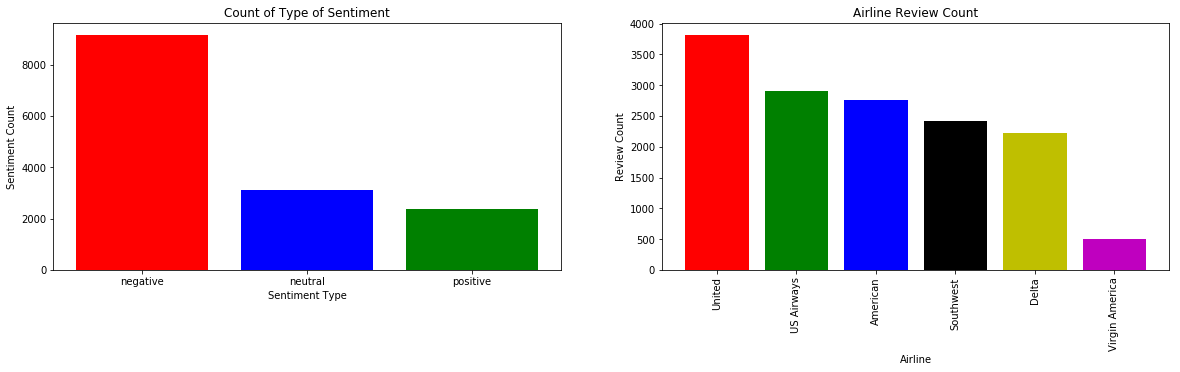

In [13]:
index = [1,2,3]
plt.figure(1,figsize=(20,10))
plt.subplot(221)
plt.bar(index,sentiment_count,color=['red','blue','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')
Index=[1,2,3,4,5,6]
my_colors = 'rgbkym'
plt.subplot(222)
plt.bar(Index,airline_total,color=my_colors)
plt.xticks(Index,['United','US Airways','American','Southwest','Delta','Virgin America'],rotation=90)
plt.xlabel('Airline')
plt.ylabel('Review Count')
plt.title('Airline Review Count')

In [14]:
airline_count = df.groupby('airline')['airline_sentiment'].value_counts()

In [15]:
airline_count

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

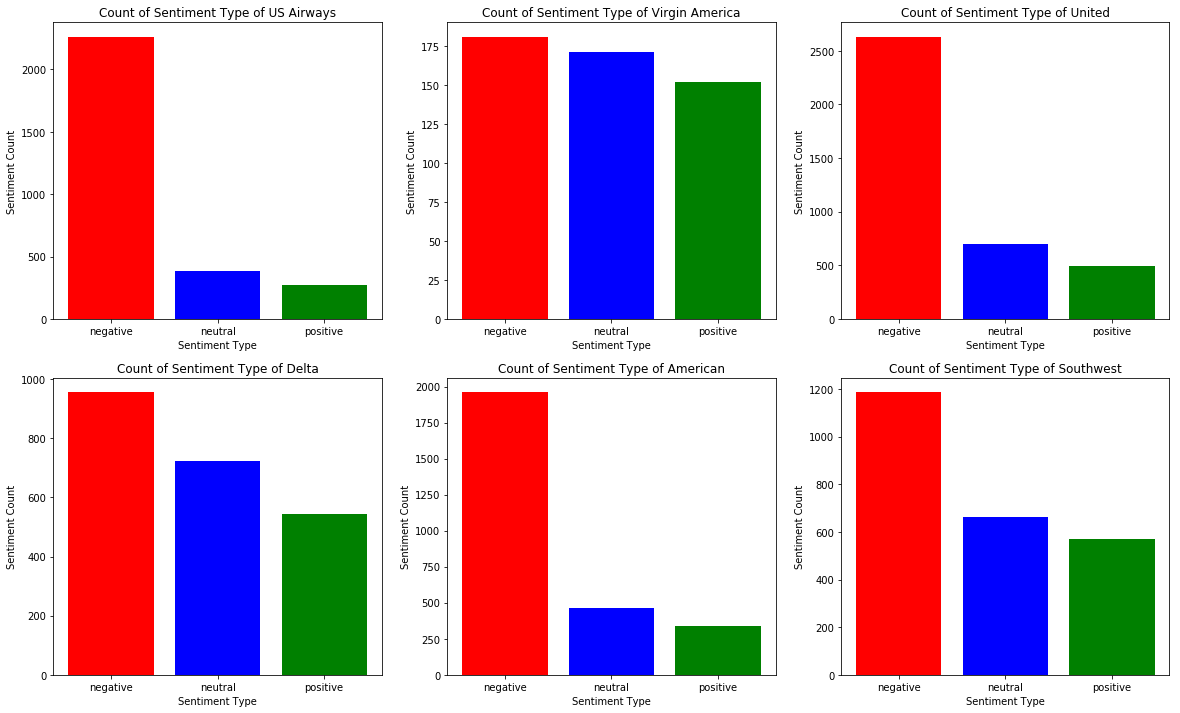

In [16]:
def plot_sentiment_airline(airline):
    df_airline = df[df['airline']==airline]
    count = df_airline['airline_sentiment'].value_counts()
    index = [1,2,3]
    plt.bar(index,count,color=['red','blue','green'])
    plt.xticks(index,['negative','neutral','positive'],rotation=0)
    plt.xlabel('Sentiment Type')
    plt.ylabel('Sentiment Count')
    plt.title('Count of Sentiment Type of '+airline)
airlines = ['US Airways','Virgin America','United','Delta','American','Southwest']
for i in range(len(airlines)):
    plt.figure(1,figsize=(20,12))
    temp = 231+i
    plt.subplot(temp)
    plot_sentiment_airline(airlines[i])

In [17]:
df.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
name                               0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64

In [18]:
df.columns 

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')

In [19]:
df.negativereason.unique()

array([nan, 'Bad Flight', "Can't Tell", 'Late Flight',
       'Customer Service Issue', 'Flight Booking Problems',
       'Lost Luggage', 'Flight Attendant Complaints', 'Cancelled Flight',
       'Damaged Luggage', 'longlines'], dtype=object)

In [20]:
df.negativereason_confidence.unique()

array([   nan, 0.    , 0.7033, ..., 0.6234, 0.644 , 0.7255])

In [21]:
timezone_count = df['user_timezone'].value_counts()
tweet = df.groupby(['airline','airline_sentiment'])['user_timezone'].value_counts()

In [22]:
# Airlines' Negative Sentiment Count by Date
df['tweet_created']=pd.to_datetime(df['tweet_created'])
df['tweet_created'] = df['tweet_created'].dt.date
day = df.groupby(['tweet_created','airline'])['airline_sentiment'].value_counts(sort=True)

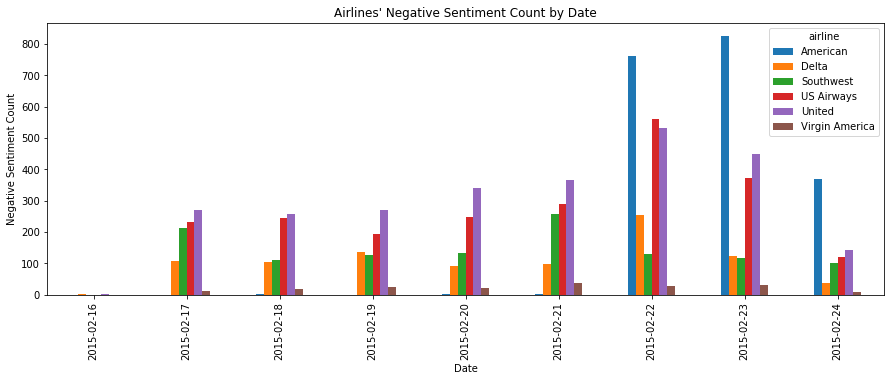

In [23]:
date = day.loc(axis=0)[:,:,'negative']
date.groupby(['tweet_created','airline']).sum().unstack().plot(kind='bar',figsize=(15,5))
plt.xlabel('Date')
plt.ylabel('Negative Sentiment Count')
plt.title("Airlines' Negative Sentiment Count by Date")
plt.show()

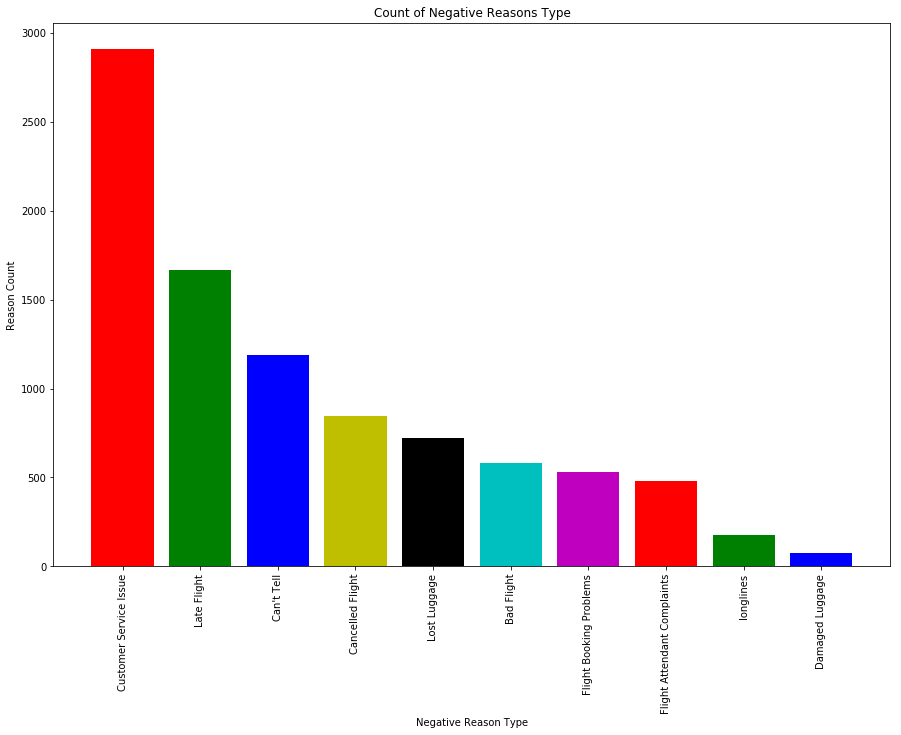

In [24]:
#Negative Reason Count
nr_count = df['negativereason'].value_counts()
nr_dict = dict(df['negativereason'].value_counts())

nr = ["Customer Service Issue","Late Flight","Can't Tell", "Cancelled Flight", "Lost Luggage", "Bad Flight","Flight Booking Problems",         
"Flight Attendant Complaints","longlines","Damaged Luggage"]

def plot_negativereason_count(reason,reason_count):
    index=list(range(10))
    plt.figure(figsize=(15,10))
    plot_colors = 'rgbykcm'
    plt.bar(index,reason_count,color=plot_colors)
    plt.xticks(index,reason,rotation=90)
    plt.xlabel('Negative Reason Type')
    plt.ylabel('Reason Count')
    plt.title('Count of Negative Reasons Type')
plot_negativereason_count(nr,nr_count)

In [25]:
negative_df = df.groupby('airline')['negativereason'].value_counts(ascending=False)

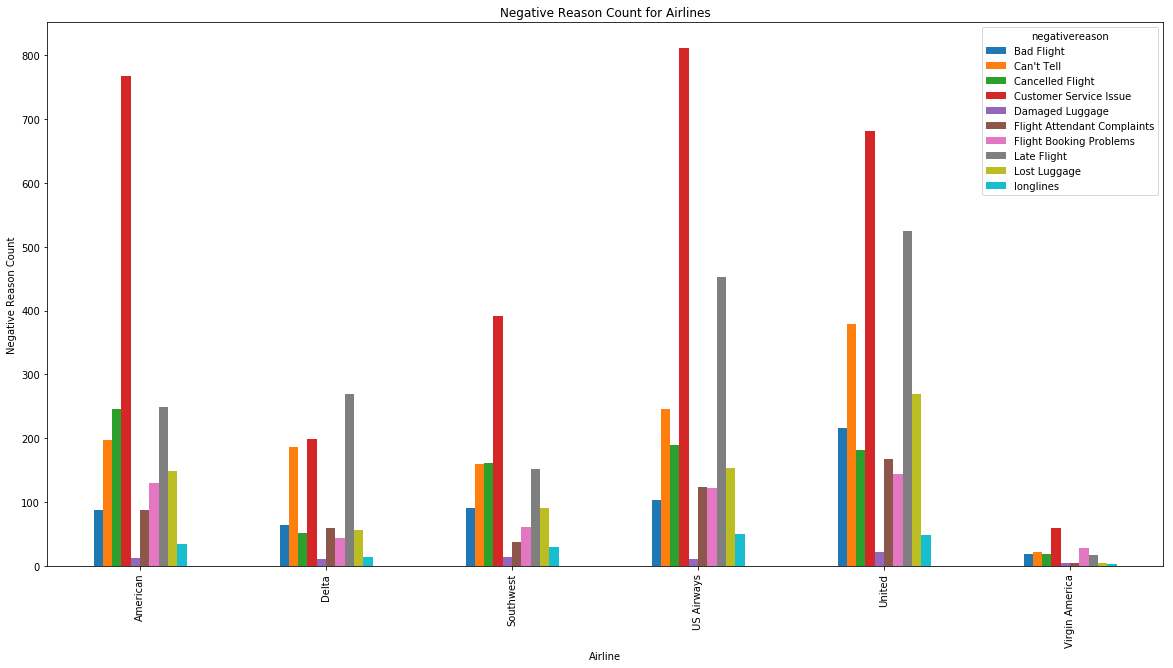

In [26]:
#Negative Reason Count for Airlines
negative_df.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(20,10))
plt.xlabel('Airline')
plt.ylabel('Negative Reason Count')
plt.title("Negative Reason Count for Airlines")
plt.show()